# **Heart Disease Diagnostic Analysis**

## **Problem Statement:**

- Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.
- Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
- You can perform EDA through python. The database extracts various information such as Heart disease rates, Heart disease by gender, by age.
- You can even compare attributes of the data set to extract necessary information.
- Make the necessary dashboard with the best you can extract from the data.
- Use various visualization and features and make the best dashboard
- Find key metrics and factors and show the meaningful relationships between attributes.

**Do your own research and come up with your findings.**


In [65]:
# Handling Warnings:
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Importing Necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

>## **Exploration of Data**

In [67]:
heart_disease = pd.read_csv('Heart Disease data.csv')

In [68]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Columns Profiling:**

- age: age of the person
  
- sex: Gender of the person (1 = male, 0 = female)

- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

- trestbps: The person resting blood pressure (mm Hg on admission to the hospital)

- chol: cholesterol of the person measured in mg/dl

- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

- restecg: Resting electro - Cardiographic measurement

(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

- thalach: The person's maximum heart rate achieved

- exang: Exercise induced angina (1 = yes; 0 = no)

- oldpeak: ST depression induced by exercise relative to rest

- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

- ca: The number of major vessels (0-3)

- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

- target: Heart disease (0 = no, 1 = yes)

In [69]:
heart_disease['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [70]:
heart_disease.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [71]:
heart_disease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [72]:
print('Number of Observations:',heart_disease.shape[0])
print('Number of Features:',heart_disease.shape[1])


Number of Observations: 1025
Number of Features: 14


In [73]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [74]:
heart_disease.describe(include= 'all').T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [75]:
# Detecting data type
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## **Checking for duplicated values:**

In [76]:
heart_disease.duplicated().sum()

723

> ## **Creating copy of Heart Disease dataframe:**

In [77]:
df = heart_disease.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


>## **Data Wrangling:**

In [78]:
data_dict = {'chol' : 'cholestrol', 'thalach': 'max_heart_rate', 'ca':'major_vessels', 'target':'heart_disease'} 

In [79]:
df.rename(columns = data_dict,inplace= True)

In [80]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'cholestrol', 'fbs', 'restecg',
       'max_heart_rate', 'exang', 'oldpeak', 'slope', 'major_vessels', 'thal',
       'heart_disease'],
      dtype='object')

### Converting numerical col to categorical columns:

In [81]:
for i in df.columns:
    print('Name of columns is {}\n'.format(i), df[i].value_counts())

Name of columns is age
 age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
Name of columns is sex
 sex
1    713
0    312
Name: count, dtype: int64
Name of columns is cp
 cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
Name of columns is trestbps
 trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117  

In [82]:
# fnc = lambda x:'Absence' if x == 0 else 'Presence'
def fnc(x):
    if x == 1:
        return 'Presence'
    else:
        return 'Absence'

In [83]:
df['heart_disease'] = df['heart_disease'].apply(fnc)

In [84]:
fnc2 = lambda x: 'Male' if x == 1 else 'Female'
df['sex'] = df['sex'].apply(fnc2)

### Feature Engineering:

In [85]:
def age_cat(age):
        if 29 <= age < 40:
            return 'Young'
        elif 40 <= age < 55:
            return 'Middle'
        elif age >= 55:
            return 'Elderly'
        else:
            return 'Unknown'

In [86]:
df['age_category'] = df['age'].apply(age_cat)

In [87]:
# Cp : The chest pain experienced :-
def cp_cat(x):
        if x == 0:
            return 'Typical Angina'
        elif x == 1:
            return 'Atypical Angina'
        elif x == 2:
            return 'Non-Anginal pain'
        else:
            return 'Asymptomatic'
# fbs: The person's fasting blood sugar :-
def fbs_cat(x):
    if x == 1:
        return 'True'
    else:
        return 'False'

#  restecg: Resting electro - Cardiographic measurement
#(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
def restecg_cat(x):
    if x == 0:
        return 'Normal'
    elif x == 1:
        return 'Have Abnormality'
    else:
        return 'Showing Probable' 
#  exang: Exercise induced angina (1 = yes; 0 = no)
def exang_cat(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
def slope_cat(x):
    if x == 0:
        return 'Upsloping'
    elif x == 1:
        return 'Flat'
    else:
        return 'Downsloping'
# ca: The number of major vessels (0-3)


# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


In [88]:
df['cp'] = df['cp'].apply(cp_cat)
df['fbs'] = df['fbs'].apply(fbs_cat)
df['restecg'] = df['restecg'].apply(restecg_cat)
df['exang'] = df['exang'].apply(exang_cat)
df['slope'] = df['slope'].apply(slope_cat)

In [89]:
df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [90]:
df.head()

,age,sex,cp,trestbps,cholestrol,fbs,restecg,max_heart_rate,exang,oldpeak,slope,major_vessels,thal,heart_disease,age_category
0,52,Male,Typical Angina,125,212,False,Have Abnormality,168,No,1.0,Downsloping,2,3,Absence,Middle
1,53,Male,Typical Angina,140,203,True,Normal,155,Yes,3.1,Upsloping,0,3,Absence,Middle
2,70,Male,Typical Angina,145,174,False,Have Abnormality,125,Yes,2.6,Upsloping,0,3,Absence,Elderly
3,61,Male,Typical Angina,148,203,False,Have Abnormality,161,No,0.0,Downsloping,1,3,Absence,Elderly
4,62,Female,Typical Angina,138,294,True,Have Abnormality,106,No,1.9,Flat,3,2,Absence,Elderly


In [91]:
df.dtypes

age                 int64
sex                object
cp                 object
trestbps            int64
cholestrol          int64
fbs                object
restecg            object
max_heart_rate      int64
exang              object
oldpeak           float64
slope              object
major_vessels       int64
thal                int64
heart_disease      object
age_category       object
dtype: object

>## **Visual Checks for missing data:**

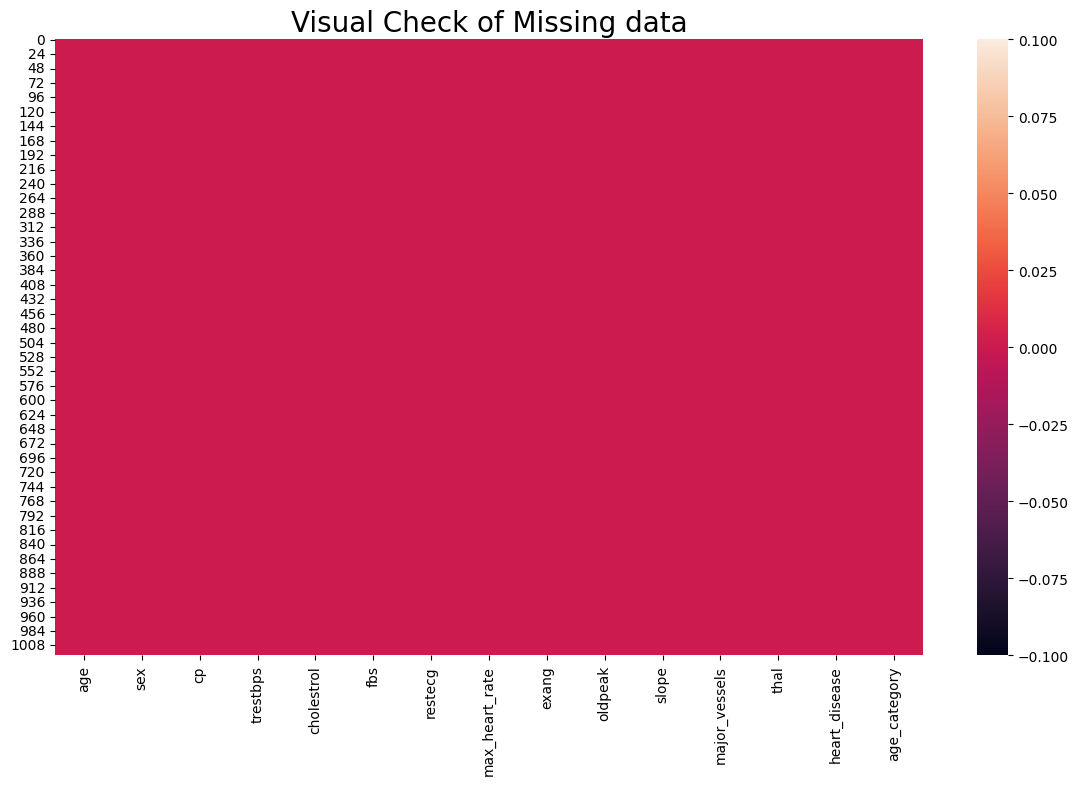

In [92]:
plt.figure(figsize=(14,8))
# Plot Heatmap:
sns.heatmap(df.isnull())
plt.title('Visual Check of Missing data',fontsize = 20)
plt.show()

In [93]:
# Checking null values:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

>## **Analysing Features:**

## **Checking for unique value in each features**

In [94]:
for i in df.columns:
    print("Number of Unique values for columns {} is {}.".format(i, df[i].nunique()))

Number of Unique values for columns age is 41.
Number of Unique values for columns sex is 2.
Number of Unique values for columns cp is 4.
Number of Unique values for columns trestbps is 49.
Number of Unique values for columns cholestrol is 152.
Number of Unique values for columns fbs is 2.
Number of Unique values for columns restecg is 3.
Number of Unique values for columns max_heart_rate is 91.
Number of Unique values for columns exang is 2.
Number of Unique values for columns oldpeak is 40.
Number of Unique values for columns slope is 3.
Number of Unique values for columns major_vessels is 5.
Number of Unique values for columns thal is 4.
Number of Unique values for columns heart_disease is 2.
Number of Unique values for columns age_category is 3.


# **Univariate Analysis:**

## Percentage of people having Heart Disease

In [95]:
n = round(df['heart_disease'].value_counts(normalize = True) * 100,2)
n

heart_disease
Presence    51.32
Absence     48.68
Name: proportion, dtype: float64

In [96]:
n.index

Index(['Presence', 'Absence'], dtype='object', name='heart_disease')

In [97]:
df['heart_disease'].value_counts()

heart_disease
Presence    526
Absence     499
Name: count, dtype: int64

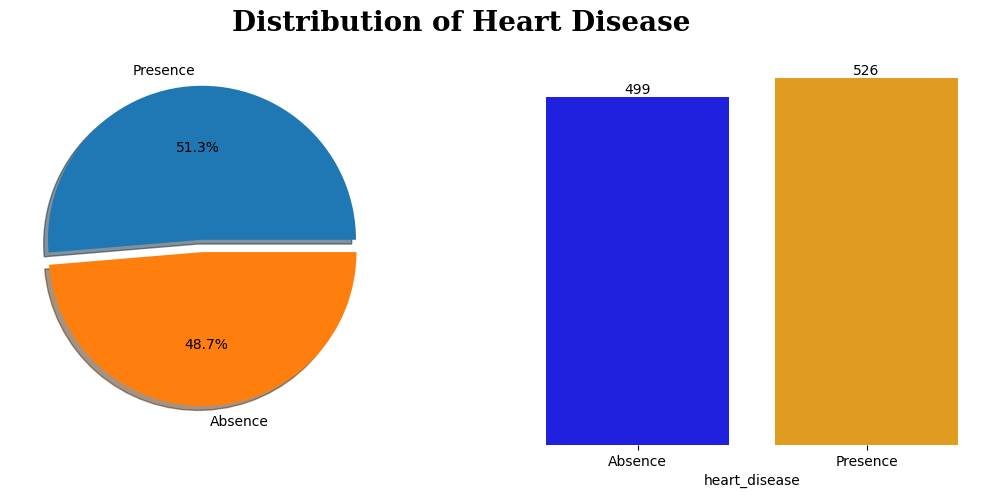

In [98]:
plt.figure(figsize=(13,5))
plt.suptitle("Distribution of Heart Disease", fontsize = 20, fontweight='bold',fontfamily='serif')

plt.subplot(121)
plt.pie(n, labels = n.index, explode=(0.08,0), shadow=True, autopct='%1.1f%%')

plt.subplot(122)
b= sns.countplot(data = df, x = 'heart_disease', palette=['blue','orange'])
for i in b.containers:
    b.bar_label(i)
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel('');

**Insights:**

- To understand the Percentage contribution of heart disease person we have ploted pie chart.
- From the overall population, people who don't have heart disease (48.7%) are lesser than those who all are having heart disease(51.3%).
- And to understand the distribution we have ploted countplot.
- From the countplot,we can conclude that People with the heart disease are more dominant than the people with no heart disease.


## Analysing the Age feature: Population distribution by Age

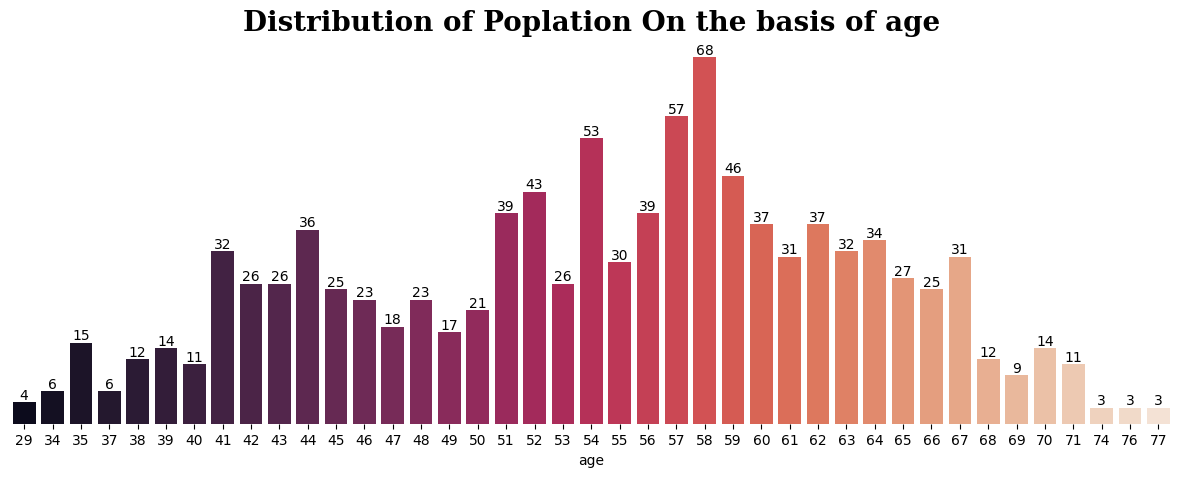

In [99]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data = df, x = 'age', palette='rocket')
plt.title('Distribution of Poplation On the basis of age', fontsize = 20, fontweight='bold',fontfamily='serif')
for c in ax.containers:
    ax.bar_label(c)
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel('');

**Insights:**

- We have ploted countplot for the distribution of Population of different age.
- From the plot we can observe that people with the age of 58 is the most significant age in comparison with other age.


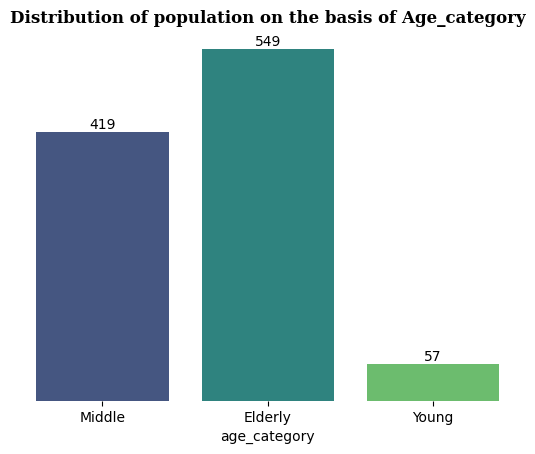

In [100]:
ax = sns.countplot(data = df, x ='age_category',palette='viridis')
for c in ax.containers:
    ax.bar_label(c)
plt.title('Distribution of population on the basis of Age_category', fontsize = 12, fontweight='bold',fontfamily='serif')
plt.yticks([])
sns.despine(left=True,bottom=True)
plt.ylabel('')
plt.show()

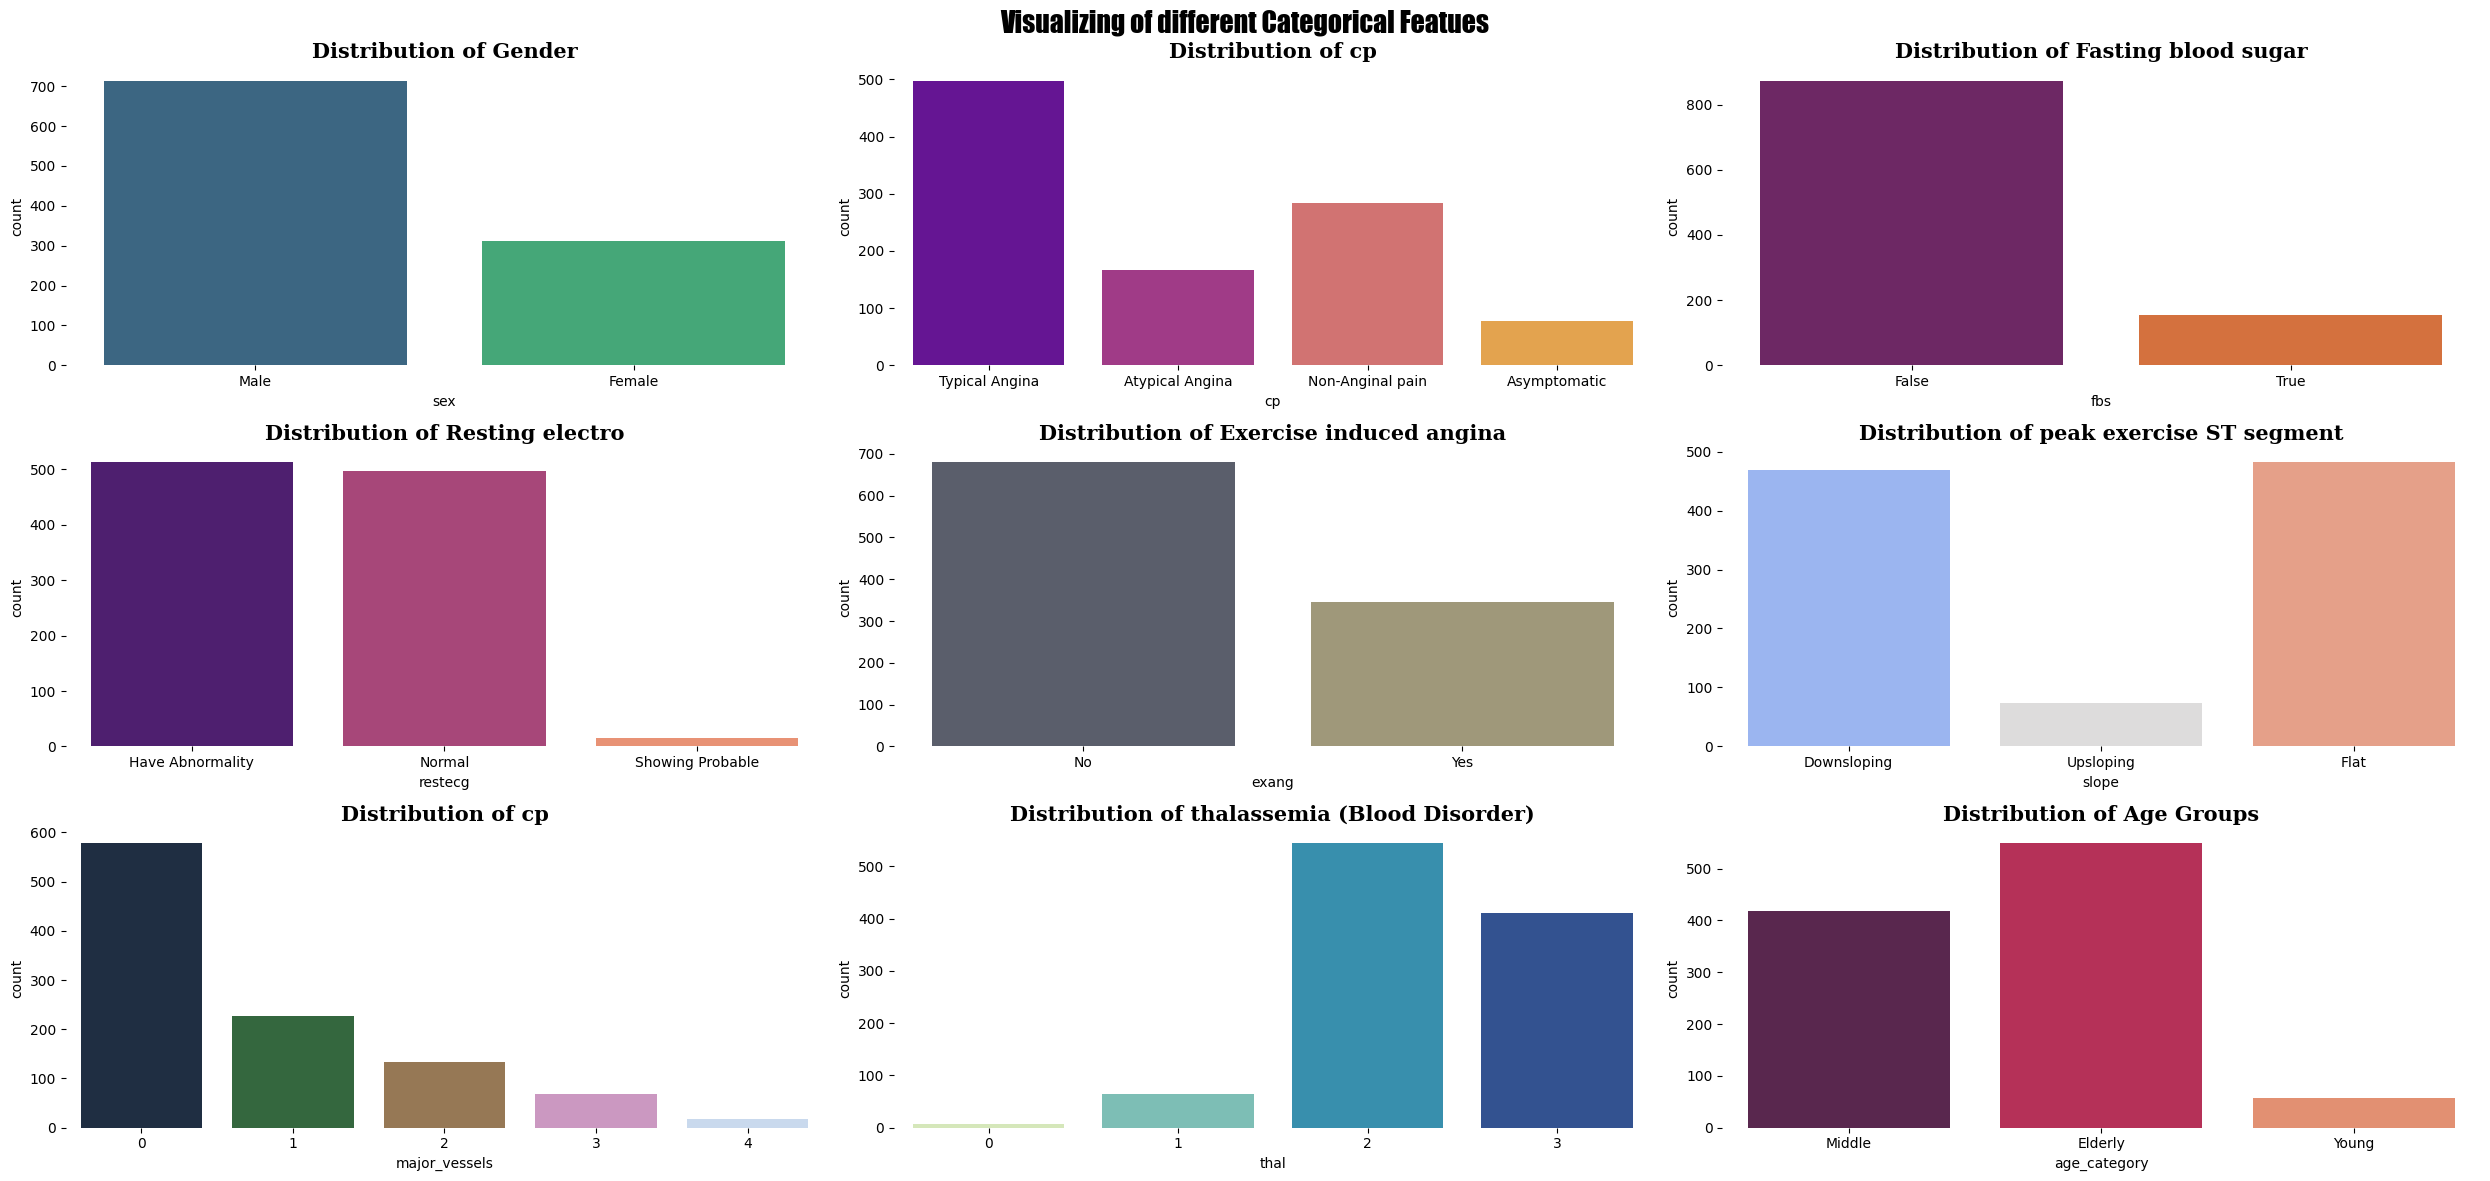

In [101]:
# palettes = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'cubehelix', 'YlGnBu', 'cool']

plt.figure(figsize=(25, 12))
plt.suptitle('Visualizing of different Categorical Featues', fontsize=20,fontweight="bold",fontfamily='fantasy')

plt.subplot(331)
sns.countplot(data = df, x = 'sex', palette='viridis')
plt.title('Distribution of Gender',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(332)
sns.countplot(data = df, x = 'cp' ,palette='plasma')
plt.title('Distribution of cp',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(333)
sns.countplot(data = df, x = 'fbs' ,palette='inferno')
plt.title('Distribution of Fasting blood sugar',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(334)
sns.countplot(data = df, x = 'restecg' ,palette='magma')
plt.title('Distribution of Resting electro',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(335)
sns.countplot(data = df, x = 'exang' ,palette='cividis')
plt.title('Distribution of Exercise induced angina',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(336)
sns.countplot(data = df, x = 'slope' ,palette='coolwarm')
plt.title('Distribution of peak exercise ST segment',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(337)
sns.countplot(data = df, x = 'major_vessels' ,palette='cubehelix')
plt.title('Distribution of cp',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(338)
sns.countplot(data = df, x = 'thal' ,palette='YlGnBu')
plt.title('Distribution of thalassemia (Blood Disorder)',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(339)
sns.countplot(data = df, x = 'age_category' ,palette='rocket')
plt.title('Distribution of Age Groups',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.tight_layout()
plt.show()

## Heart disease vs other features:

In [102]:
col = [['sex', 'cp', 'fbs','restecg','exang', 'slope', 'major_vessels','thal','age_category']]
target = [['heart_disease']]

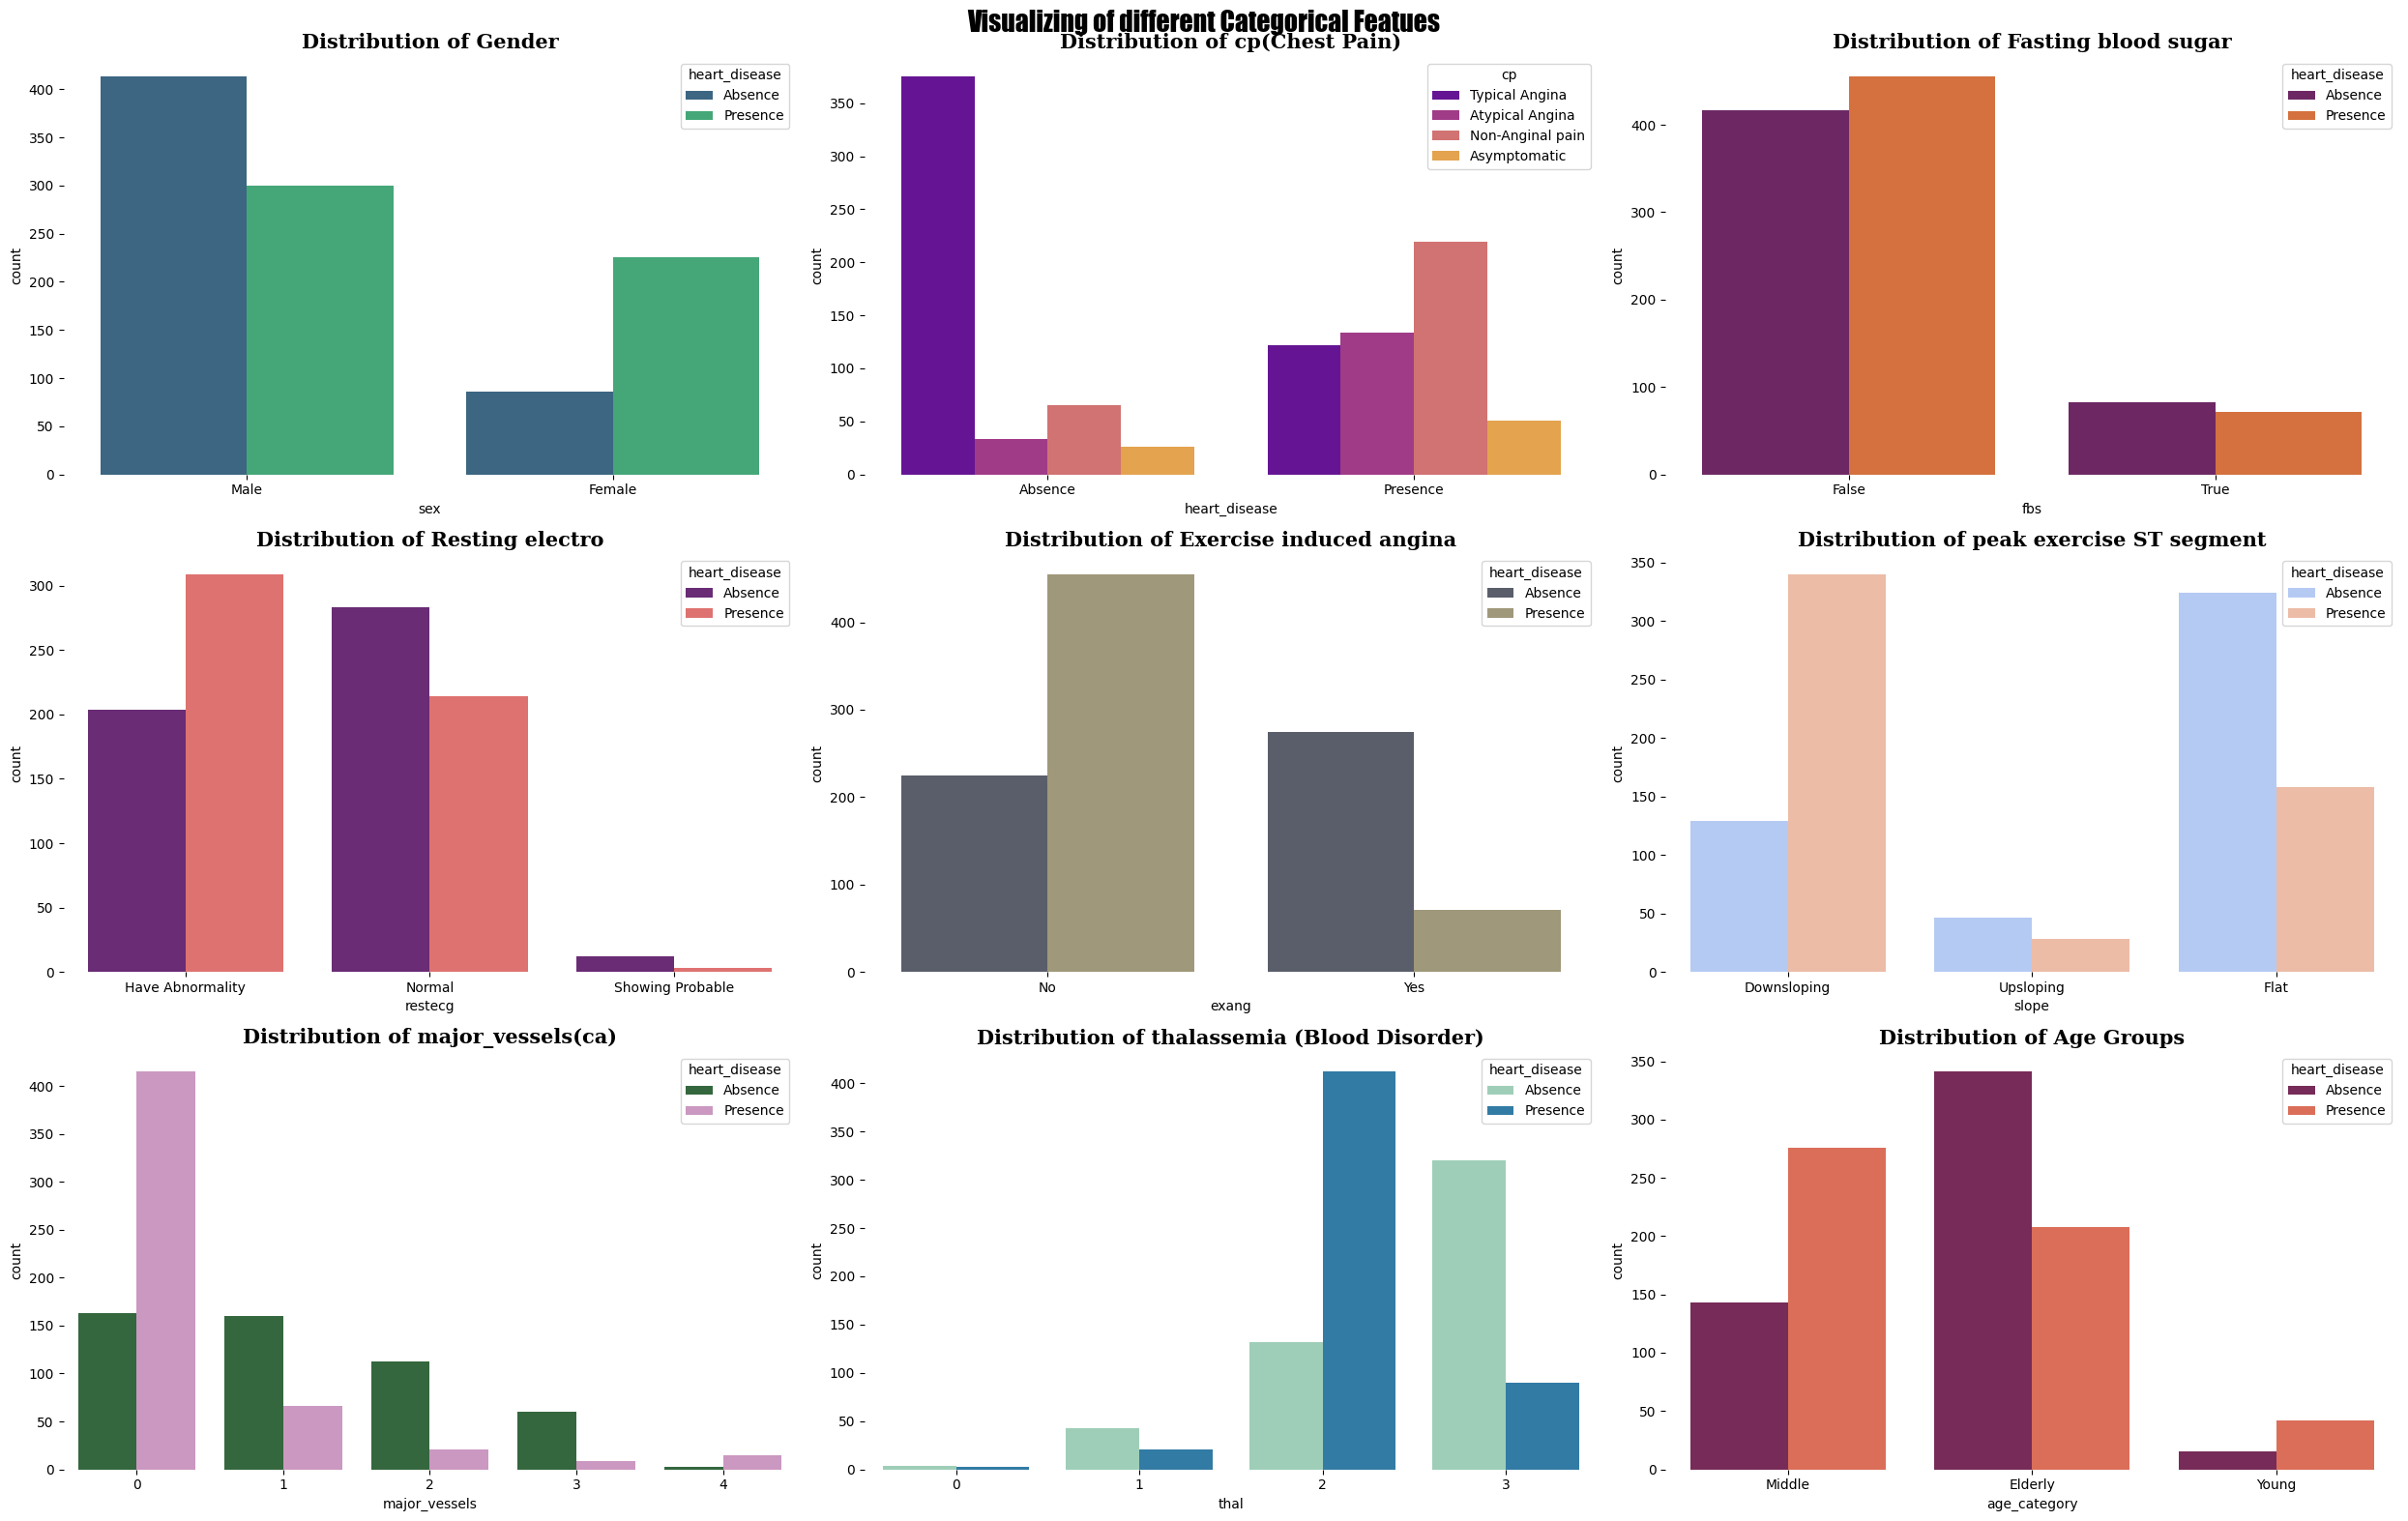

In [103]:

plt.figure(figsize=(25, 16))
plt.suptitle('Visualizing of different Categorical Featues', fontsize=20,fontweight="bold",fontfamily='fantasy')

plt.subplot(331)
sns.countplot(data = df, x = 'sex', hue = 'heart_disease', palette='viridis')
plt.title('Distribution of Gender',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(332)
sns.countplot(data = df, hue = 'cp' , x = 'heart_disease', palette='plasma')
plt.title('Distribution of cp(Chest Pain)',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(333)
sns.countplot(data = df, x = 'fbs' , hue = 'heart_disease',palette='inferno')
plt.title('Distribution of Fasting blood sugar',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(334)
sns.countplot(data = df, x = 'restecg', hue = 'heart_disease' ,palette='magma')
plt.title('Distribution of Resting electro',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(335)
sns.countplot(data = df, x = 'exang', hue = 'heart_disease' ,palette='cividis')
plt.title('Distribution of Exercise induced angina',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(336)
sns.countplot(data = df, x = 'slope' , hue = 'heart_disease',palette='coolwarm')
plt.title('Distribution of peak exercise ST segment',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(337)
sns.countplot(data = df, x = 'major_vessels', hue = 'heart_disease' ,palette='cubehelix')
plt.title('Distribution of major_vessels(ca)',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(338)
sns.countplot(data = df, x = 'thal', hue = 'heart_disease' ,palette='YlGnBu')
plt.title('Distribution of thalassemia (Blood Disorder)',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.subplot(339)
sns.countplot(data = df, x = 'age_category' , hue = 'heart_disease',palette='rocket')
plt.title('Distribution of Age Groups',fontsize=15, fontweight="bold",fontfamily='serif')
sns.despine(left=True,bottom=True,trim=True)

plt.tight_layout()
plt.show()

Insights:

- **When comparing Heart disease vs sex(Gender)**, we conclude that Male are less prone to heart disease, but for female presence of Heart disease is more.
- **When comparing Heart disease vs cp(chest pain)**, we observe that people with Atypical Angima are more prone to any heart disease, but In case of Asymptomatic type of chest pain people are mostly less affected.
- **Observing fbs vs heart disease**, when the amount of blood sugar is False then people in this case is more prone to any heart disease.
- **comparing ca vs heart diasease**; when the number of major vessel is 0 then the present of any sort of heart related disease is more.
- **Observing exang vs heaert diasease**, people who do exercise induded angima, are less prone to any heart disease. while who don't do chances of getting haert heart is more.
-  **Observing slope vs heart disease**, with the flat slope we can detect the presence of heart disease is more, and for the upslope presence of any heart related disease is less. or (Absense is more)
-  **Observing Blood disorder vs heart diseases**, people with Blood disorder of type 2 are more prone to the heart diseases, and people with blood disorder 3 type are having less probability of having any heart related problem.
- **observing Age groups vs heart disesase** Middle Age People are most affected by Heart Disease AND  Elderly Age People are mostly free from any kind of Heart Disease.

## **Heart disease vs Gender feature:**

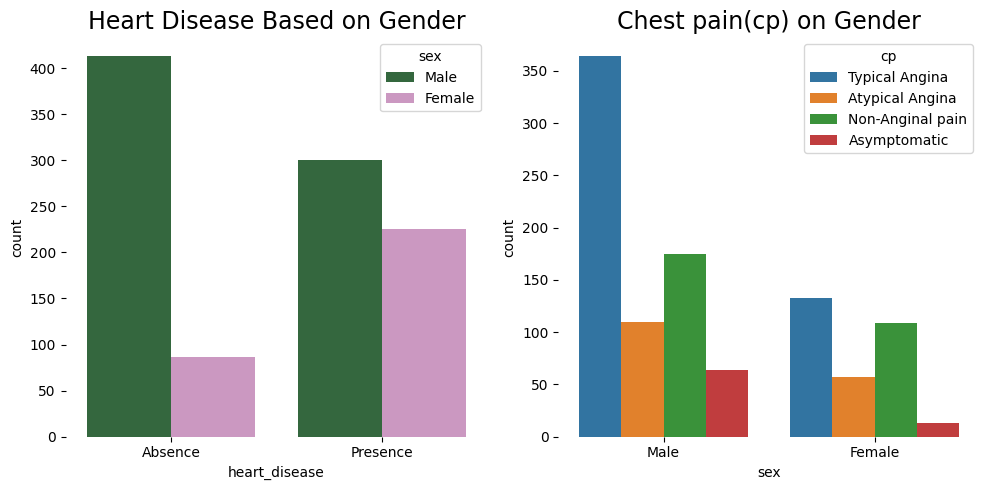

In [104]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x=df['heart_disease'], hue='sex', data=df, palette='cubehelix')
plt.title('Heart Disease Based on Gender',fontsize=17)

plt.subplot(122)
sns.countplot(data = df, x = 'sex', hue = 'cp')
plt.title('Chest pain(cp) on Gender',fontsize=17)

sns.despine(left=True,bottom=True,trim=True)
plt.tight_layout()
plt.show()

 - We can see that Males are less prone to any kind of Heart Disease, on the other hand there are more chanses of female having heart disease.
 -  From the 2nd plot we can observe that, people having asymptomatic chest pain have a higher chance of heart disease
 -  Males are more prone to this kind of chest pain. or higher number of men are suffering from Asymptomatic type of Chest Pain
- Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.

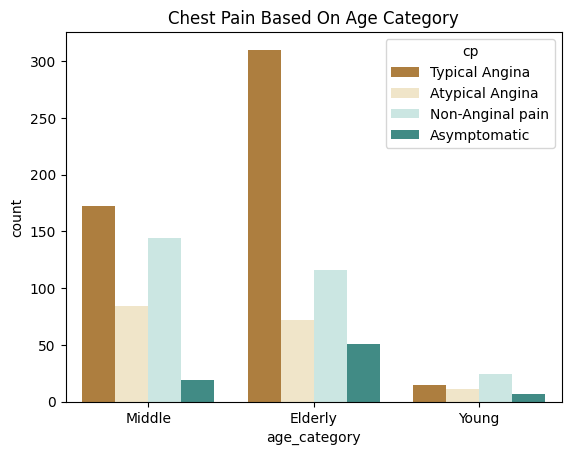

In [105]:
sns.countplot(x='age_category', hue='cp', data=df,  palette='BrBG')
plt.title('Chest Pain Based On Age Category');

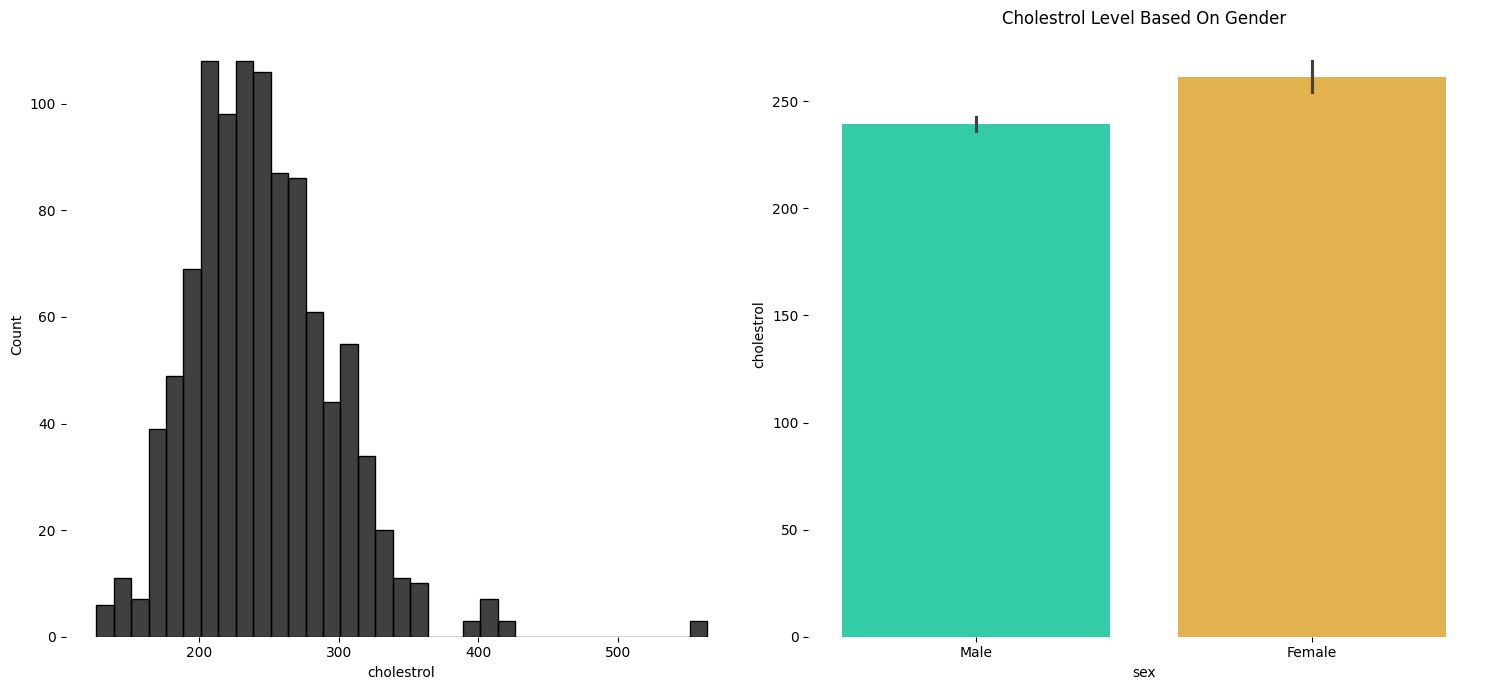

In [106]:
plt.figure(figsize = (15,7))

plt.subplot(121)
sns.histplot(data = df, x = 'cholestrol', color = 'black')

plt.subplot(122)
sns.barplot(x='sex', y='cholestrol', data=df, palette='turbo')
plt.title("Cholestrol Level Based On Gender")

sns.despine(left=True,bottom=True,trim=True)
plt.tight_layout()
plt.show()

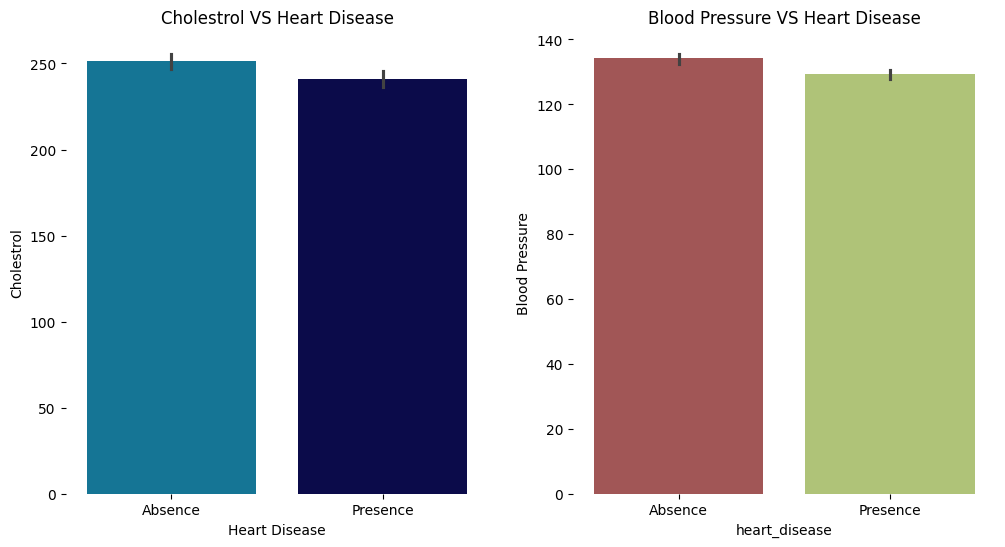

In [107]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.barplot(x = 'heart_disease', y = 'cholestrol', data=df, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholestrol')

plt.subplot(122)
sns.barplot(x='heart_disease', y ='trestbps', data=df, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease')
plt.ylabel('Blood Pressure')

sns.despine(left=True,bottom=True,trim=True)
plt.show()

Insights:

- Males are having less cholestrol than Females. i.e.
- Females are having higher cholestrol value
- Higher cholestrol level cause high chances of Heart disease.
- people with higher blood pressure have more chances of Heart diseases.

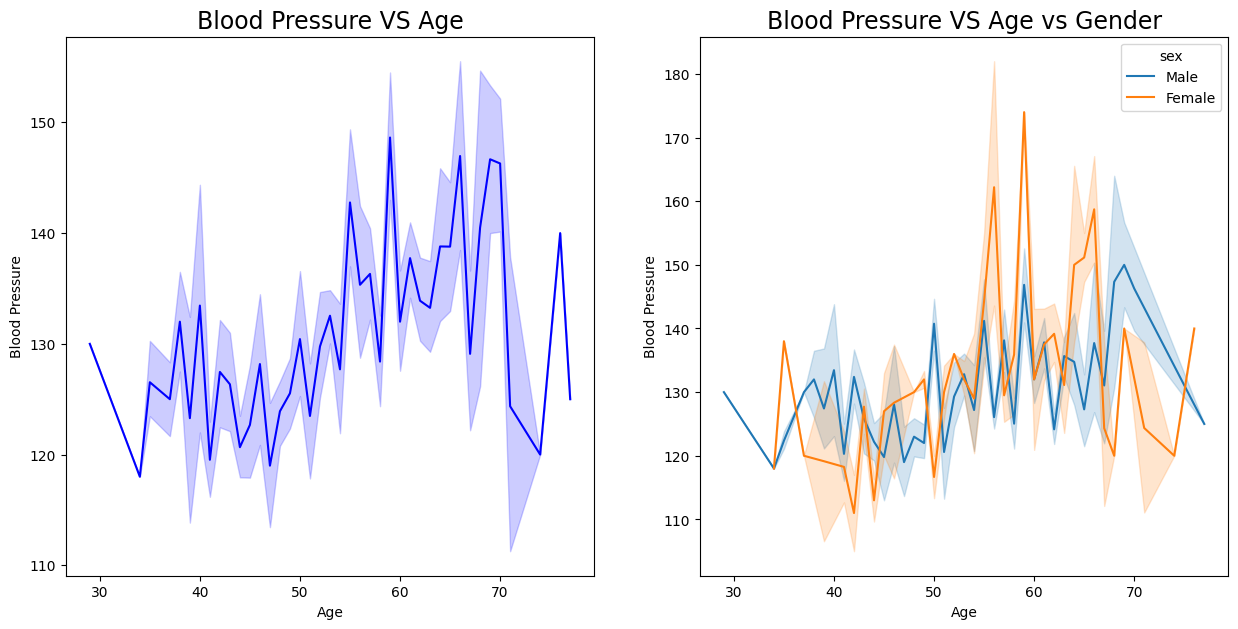

In [108]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.lineplot(x = 'age', y='trestbps', data=df, color='b')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

plt.subplot(122)
sns.lineplot(x = 'age', y='trestbps',hue = 'sex' ,data=df)
plt.title('Blood Pressure VS Age vs Gender', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')


plt.show()

- Here we can observe that Blood Pressure increases between age of 55 to 65 and somehow continue the pattern till 70.
 - as the value o fage increases the value o

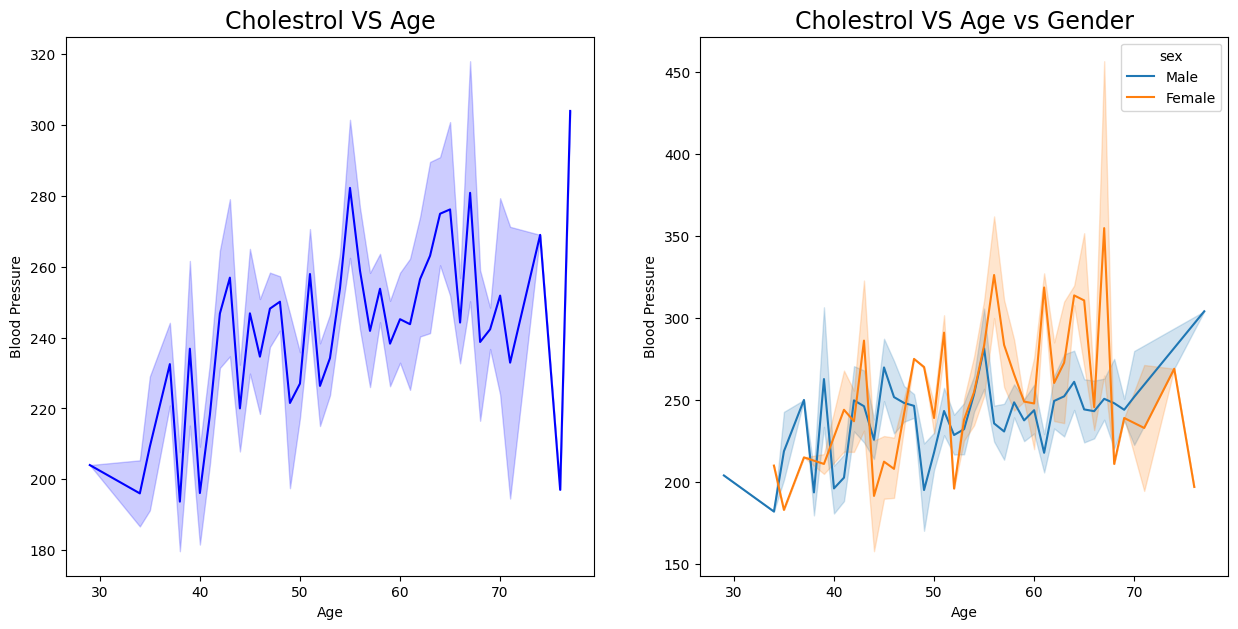

In [117]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.lineplot(x = 'age', y='cholestrol', data=df, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

plt.subplot(122)
sns.lineplot(x = 'age', y='cholestrol',hue = 'sex' ,data=df)
plt.title('Cholestrol VS Age vs Gender', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')


plt.show()

Insights:
- Cholestrol value Increases between the age group of 50-65.
- As the age of the Female increases then the cholestrol value also increase when compared to males.

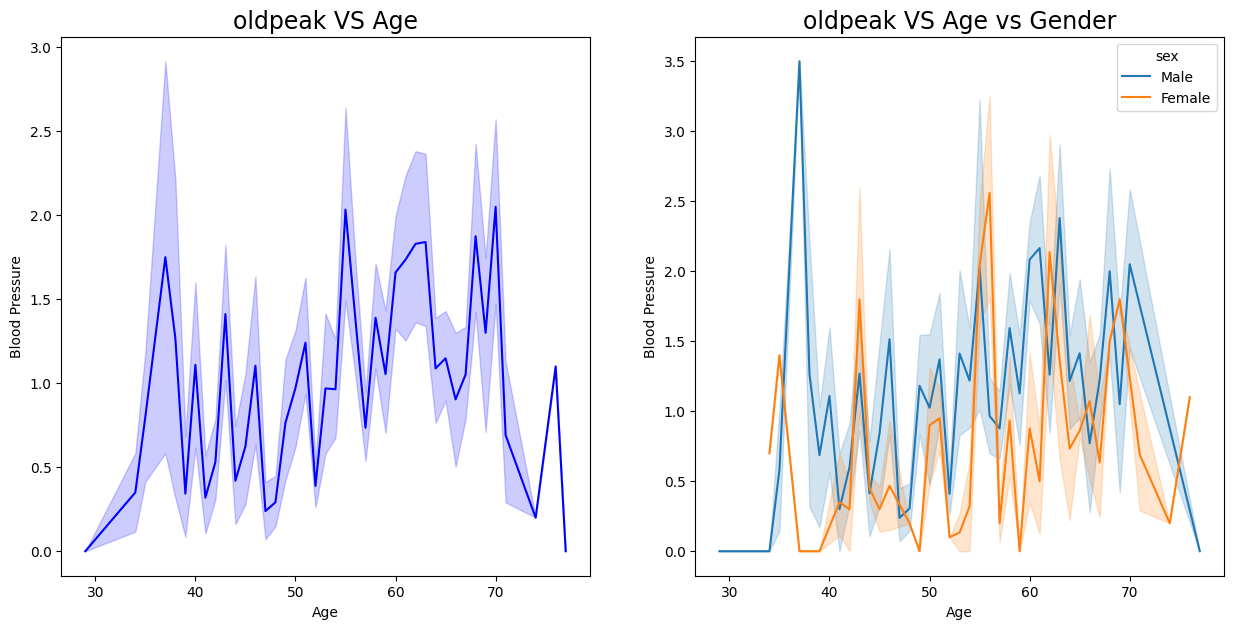

In [110]:
plt.figure(figsize=(15,7))

plt.subplot(121)
sns.lineplot(x = 'age', y='oldpeak', data=df, color='b')
plt.title('oldpeak VS Age', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

plt.subplot(122)
sns.lineplot(x = 'age', y='oldpeak',hue = 'sex' ,data=df)
plt.title('oldpeak VS Age vs Gender', fontsize=17)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')


plt.show()

Insights:

- ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.
- We can observe from here that ST depression(Old peak) mostly increases between the age group of 30-40.
- Males are higher value of ST depression


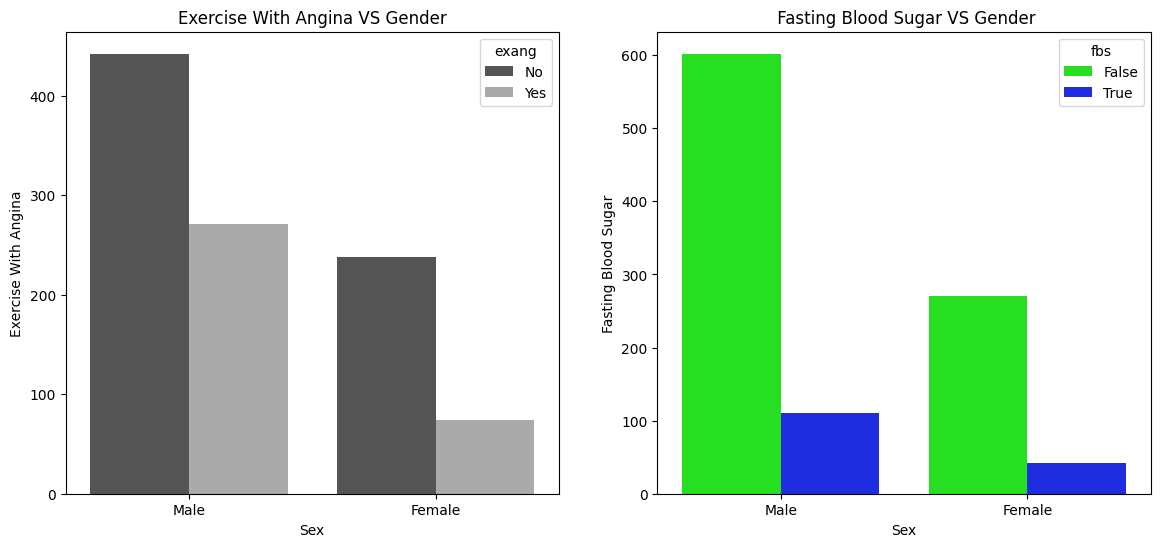

In [111]:
plt.figure(figsize = (14,6))

plt.subplot(121)
sns.countplot(x='sex', hue ='exang', data=df, palette='binary_r')
plt.title('Exercise With Angina VS Gender')
plt.xlabel('Sex')
plt.ylabel('Exercise With Angina')

plt.subplot(122)
sns.countplot(hue ='fbs', x='sex', data=df, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender')
plt.xlabel('Sex')
plt.ylabel('Fasting Blood Sugar')
plt.show()

plt.show()

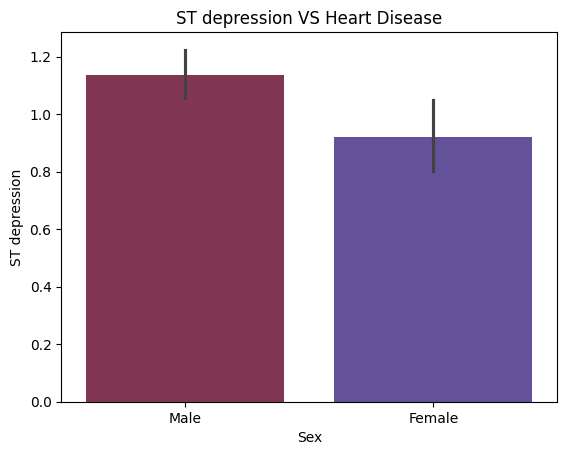

In [112]:
sns.barplot(x='sex', y ='oldpeak', data=df, palette='twilight_r')
plt.title('ST depression VS Heart Disease')
plt.xlabel('Sex')
plt.ylabel('ST depression')
plt.show()

Insights: 
- Males have have high Exercise Angina
- In comparison, More Males are prone to ST depression as compare to females
- A type of chest pain caused by reduced blood flow to the heart.
- Males have high no of Fasting Blood Sugar over 120

In [113]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'cholestrol', 'fbs', 'restecg',
       'max_heart_rate', 'exang', 'oldpeak', 'slope', 'major_vessels', 'thal',
       'heart_disease', 'age_category'],
      dtype='object')

> # **Heatmap**

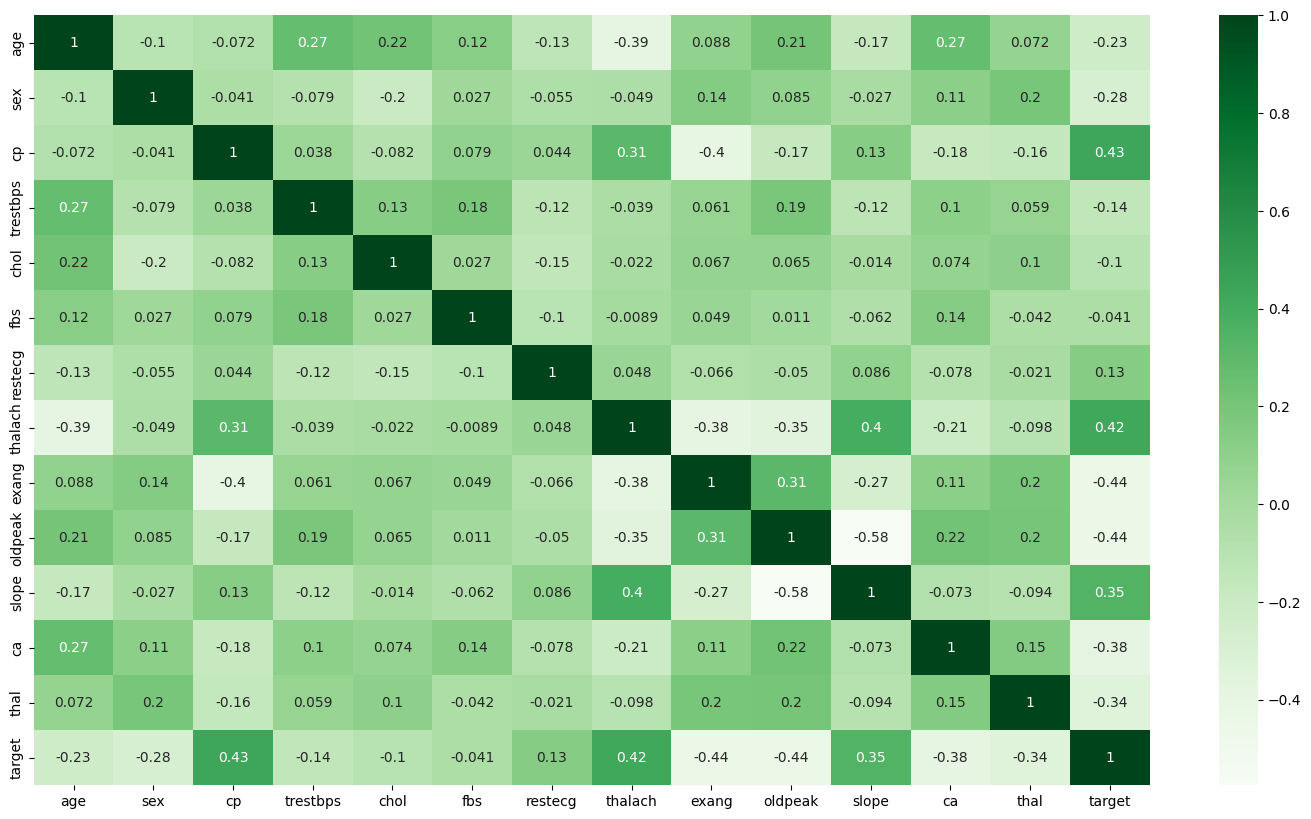

In [114]:
#Heatmap Creation using Seaborn
plt.figure(figsize=(18,10))
sns.heatmap(heart_disease.corr(), annot=True, cmap = 'Greens');

## **Pair plot**

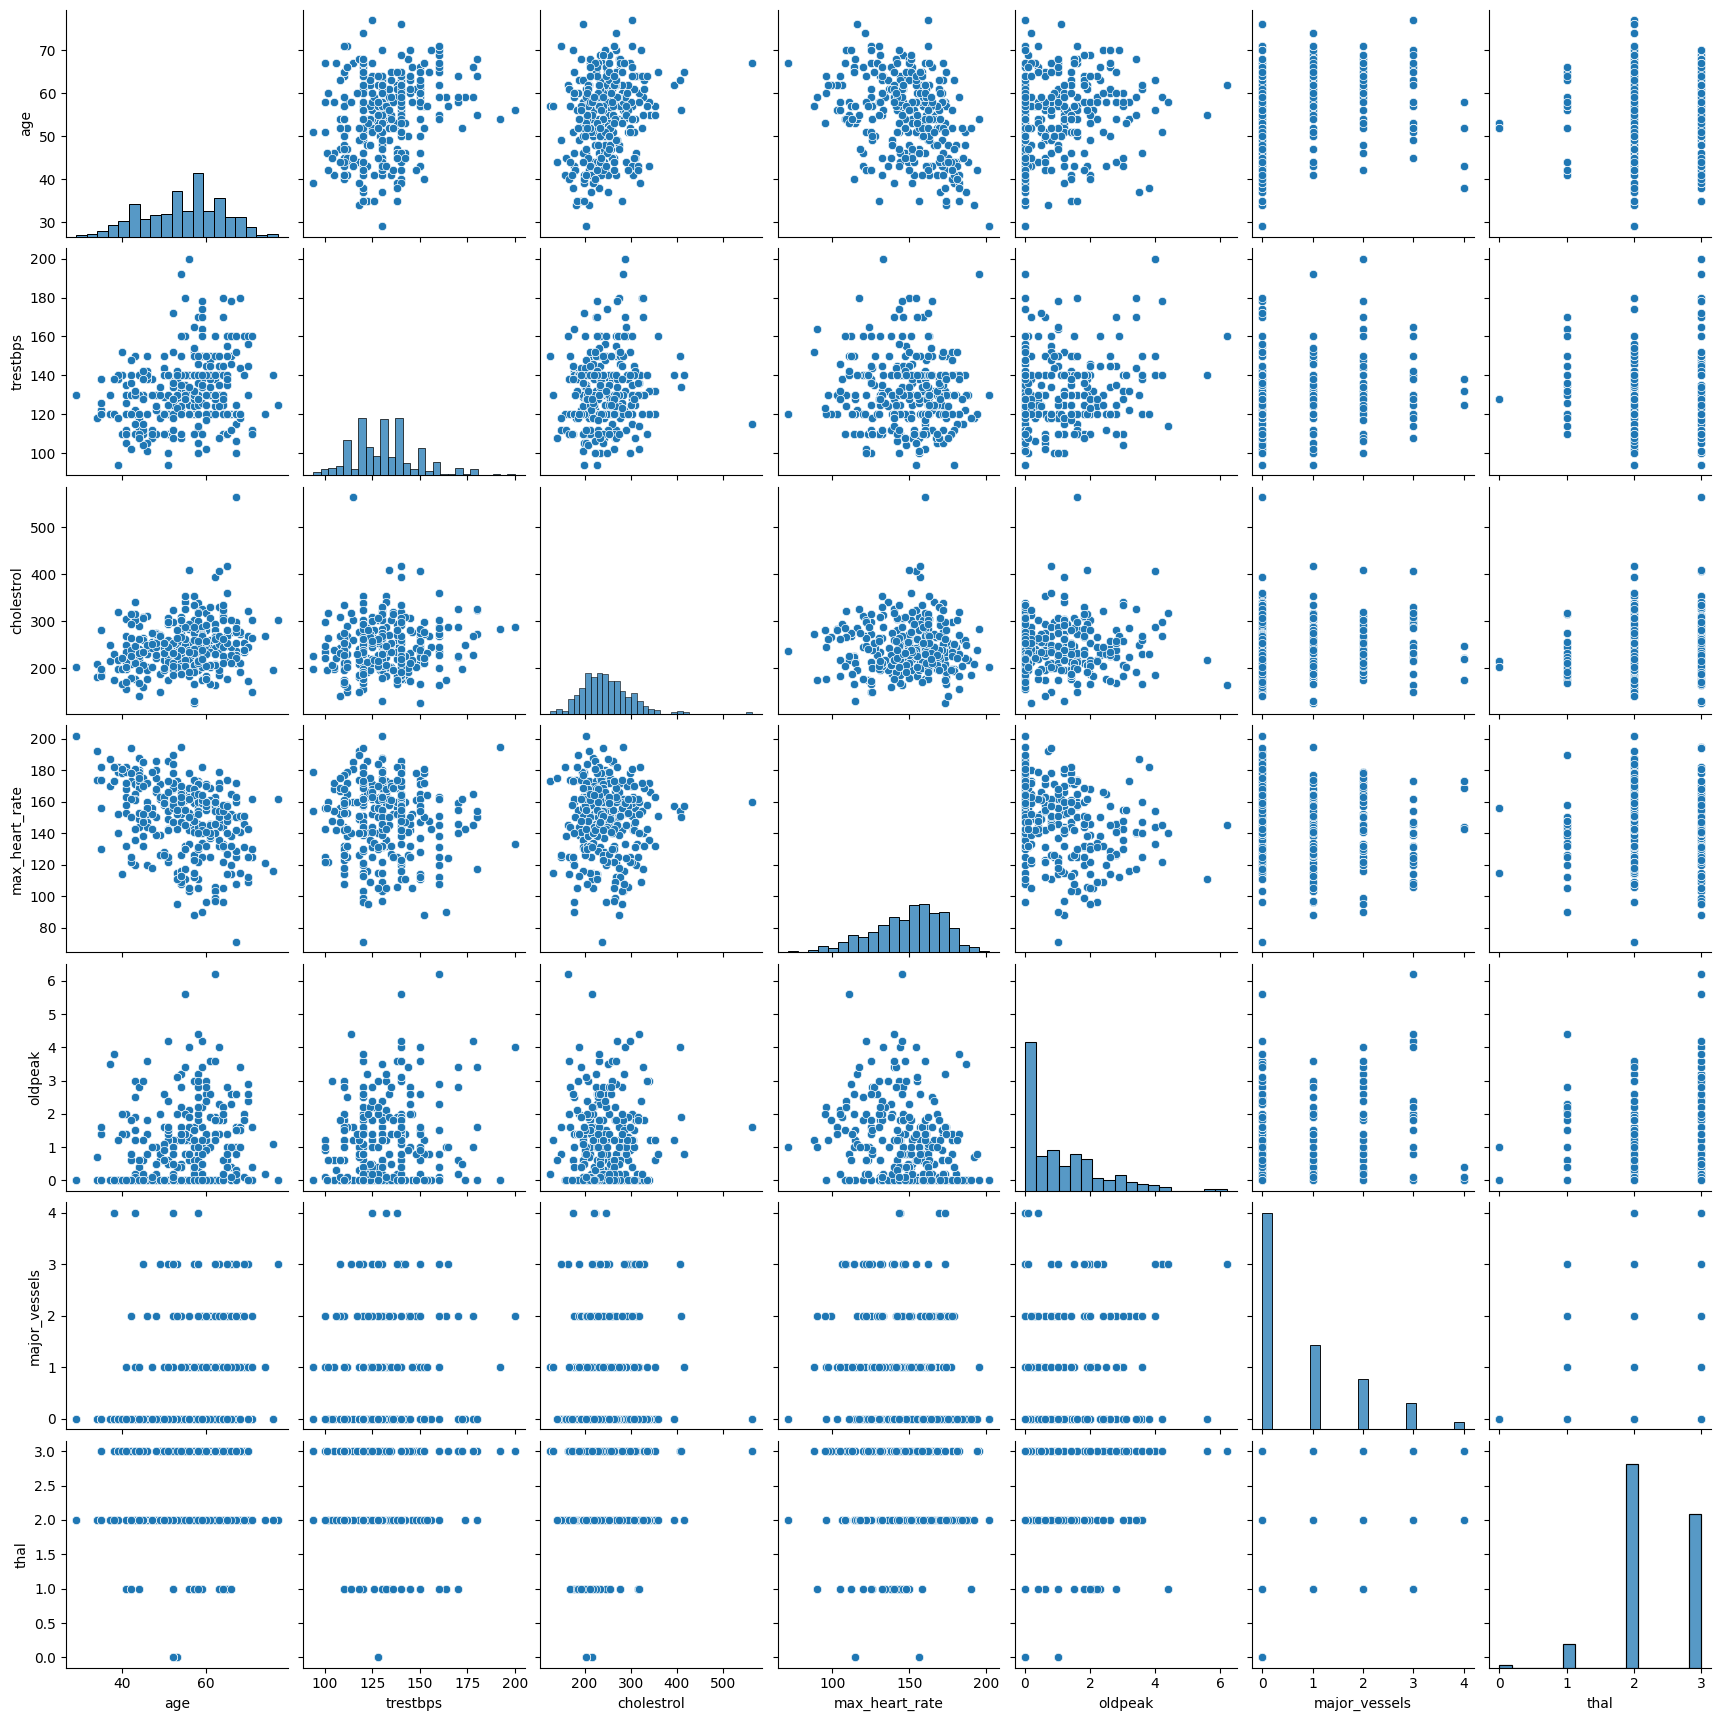

In [115]:
sns.pairplot(df);

Insights: 

- From the heatmap and pair plot we can observe the Correlation between the features.
- Cp(chest pain) and Tartget(heart Disease) are highly positively correlated, means as the Chest pain increases chances of Heart attack also increases.
- Thalach(Person heart rate) and target also highly positively correlated with each other.
- Means as the heart rate increases chances of Heart attack also increases.